In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv
/kaggle/input/health-insurance-cross-sell-prediction/train.csv
/kaggle/input/health-insurance-cross-sell-prediction/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
df.shape

(381109, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


In [10]:
df['Gender']=df['Gender'].map({'Male':1,'Female':2})
df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1,'No':0})
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,2,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1-2 Year,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,< 1 Year,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,< 1 Year,0,35118.0,160.0,161,0
381107,381108,2,68,1,14.0,0,> 2 Years,1,44617.0,124.0,74,0


In [11]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [12]:
df['Vehicle_Age']=df['Vehicle_Age'].map({'1-2 Year':1,'< 1 Year':0,'> 2 Years':2})
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,2,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,381108,2,68,1,14.0,0,2,1,44617.0,124.0,74,0


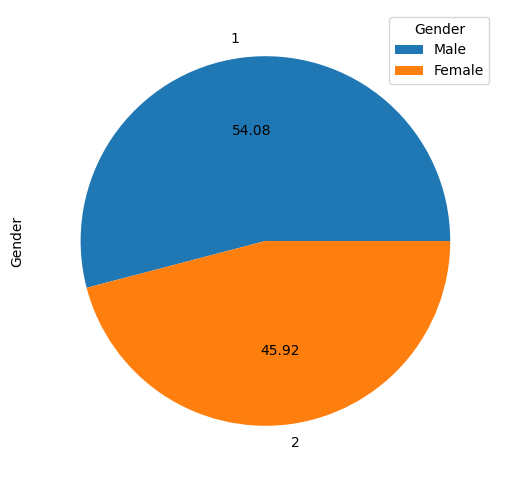

In [13]:

labels = {1: 'Male', 2: 'Female'}

df['Gender'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6))

plt.legend(title='Gender', labels=[labels[x] for x in df['Gender'].value_counts().index],loc='best')
plt.show()


/tmp/ipykernel_20/3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

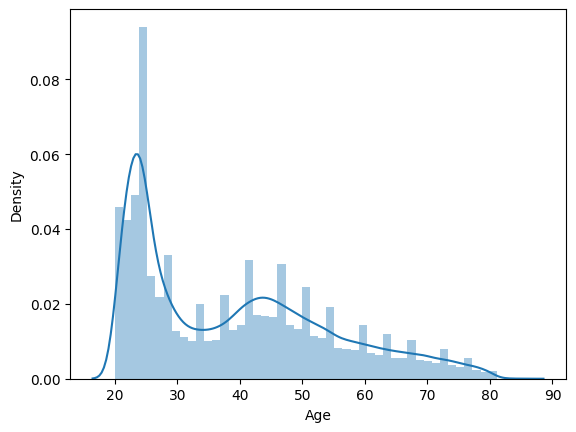

In [14]:
sns.distplot(df['Age'])

0         3.806662
1         4.343805
2         3.871201
3         3.091042
4         3.401197
            ...   
381104    4.317488
381105    3.433987
381106    3.091042
381107    4.234107
381108    3.850148
Name: Age, Length: 381109, dtype: float64


/tmp/ipykernel_20/757934411.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

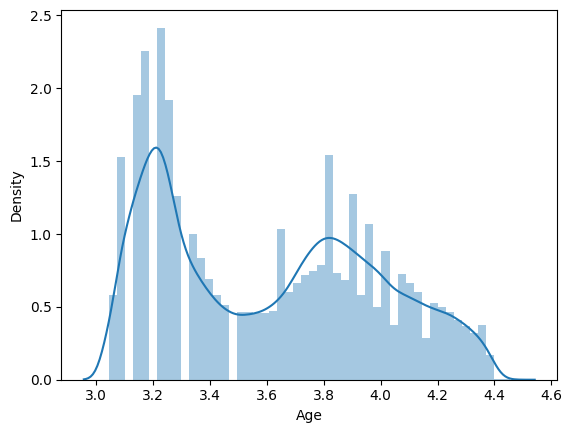

In [15]:
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame with a column 'age'

# Apply logarithmic transformation to the 'age' column
df['Age'] = np.log1p(df['Age'])

# Check the updated 'age' column
print(df['Age'])
sns.distplot(df['Age'])

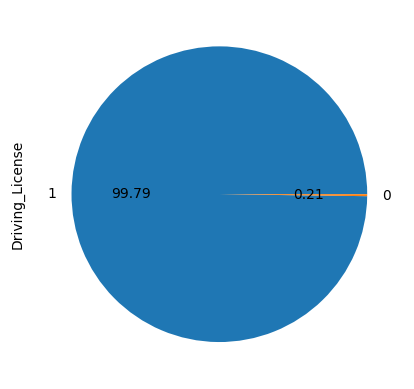

In [16]:
df['Driving_License'].value_counts().plot(kind='pie',autopct = "%.2f")
plt.show()


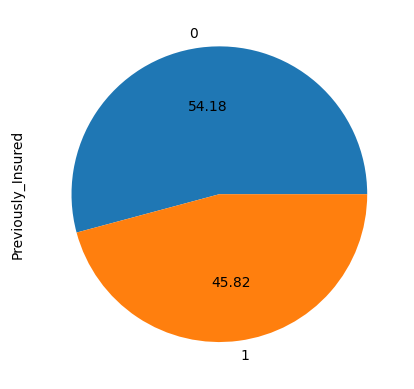

In [17]:
df['Previously_Insured'].value_counts().plot(kind='pie',autopct = "%.2f")
plt.show()

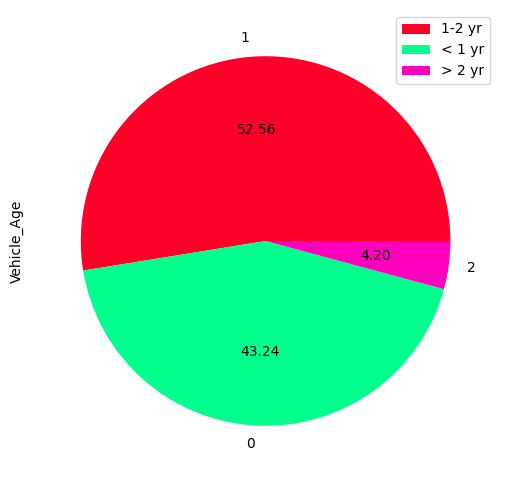

In [18]:
labels = {0: '< 1 yr', 1: '1-2 yr',2:'> 2 yr'}
df["Vehicle_Age"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "gist_rainbow",figsize=(6,6))
plt.legend(labels=[labels[x] for x in df['Vehicle_Age'].value_counts().index],loc='best')
plt.show()

<AxesSubplot: ylabel='Vehicle_Damage'>

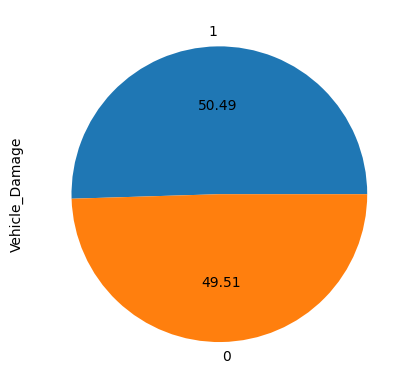

In [19]:
df["Vehicle_Damage"].value_counts().plot(kind='pie',autopct = "%.2f")

/tmp/ipykernel_20/843963849.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Annual_Premium"])


<AxesSubplot: xlabel='Annual_Premium', ylabel='Density'>

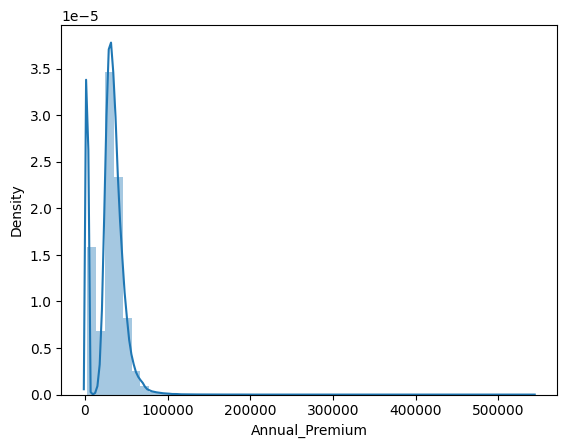

In [20]:
sns.distplot(df["Annual_Premium"])

/tmp/ipykernel_20/549211359.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual_Premium'])


<AxesSubplot: xlabel='Annual_Premium', ylabel='Density'>

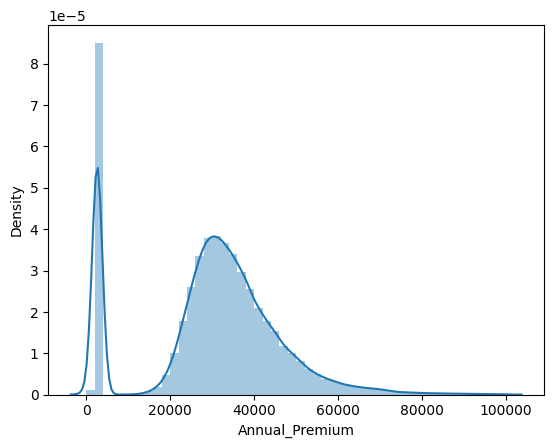

In [21]:
df["Annual_Premium"] = np.where(df["Annual_Premium"] >100000 , 0 , df["Annual_Premium"])
sns.distplot(df['Annual_Premium'])

/tmp/ipykernel_20/486895691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Policy_Sales_Channel'])


<AxesSubplot: xlabel='Policy_Sales_Channel', ylabel='Density'>

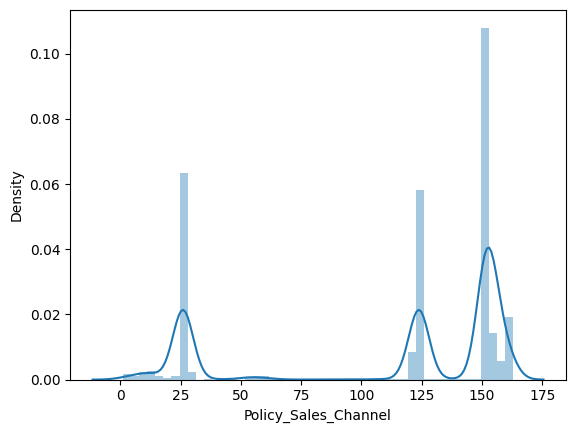

In [22]:
sns.distplot(df['Policy_Sales_Channel'])

/tmp/ipykernel_20/2749416843.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Vintage'])


<AxesSubplot: xlabel='Vintage', ylabel='Density'>

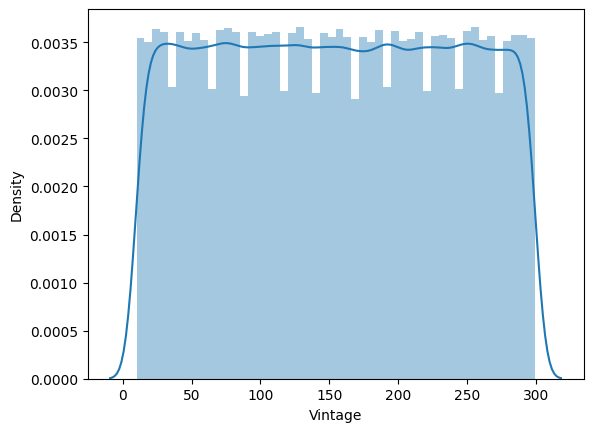

In [23]:
sns.distplot(df['Vintage'])

In [24]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,3.806662,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,4.343805,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,3.871201,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,3.091042,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,2,3.401197,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,4.317488,1,26.0,1,1,0,30170.0,26.0,88,0
381105,381106,1,3.433987,1,37.0,1,0,0,40016.0,152.0,131,0
381106,381107,1,3.091042,1,30.0,1,0,0,35118.0,160.0,161,0
381107,381108,2,4.234107,1,14.0,0,2,1,44617.0,124.0,74,0


In [25]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame

# Select the columns to be scaled
columns_to_scale = ['Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))

# Apply MinMaxScaler to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Check the updated DataFrame
df


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,3.806662,1,28.0,0,2,1,4.045440,1.543210,7.162630,1
1,2,1,4.343805,1,3.0,0,1,0,3.353634,1.543210,5.986159,0
2,3,1,3.871201,1,28.0,0,2,1,3.829438,1.543210,0.588235,1
3,4,1,3.091042,1,11.0,1,0,0,2.861929,9.320988,6.678201,0
4,5,2,3.401197,1,41.0,1,0,0,2.749627,9.320988,1.003460,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,4.317488,1,26.0,1,1,0,3.017030,1.543210,2.698962,0
381105,381106,1,3.433987,1,37.0,1,0,0,4.001640,9.320988,4.186851,0
381106,381107,1,3.091042,1,30.0,1,0,0,3.511835,9.814815,5.224913,0
381107,381108,2,4.234107,1,14.0,0,2,1,4.461745,7.592593,2.214533,0


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'y' is the corresponding target variable

# Split the data into training and testing sets
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of LogisticRegression
logreg = LogisticRegression(penalty='none')

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Accuracy: 0.8750623179659416


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8750491983941644


In [28]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8750623179659416


In [29]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('nb', gnb), ('lr', logreg), ('dt', knn)], voting='soft')

# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = voting_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Accuracy: 0.8750623179659416


In [30]:
# from sklearn.ensemble import RandomForestClassifier


In [31]:
# rf_clf = RandomForestClassifier()

# # Fit the Random Forest classifier on the training data
# rf_clf.fit(X_train, y_train)



In [32]:
# # Predict the target variable for the test data
# y_pred = rf_clf.predict(X_test)

# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [33]:
# from sklearn.ensemble import VotingClassifier
# voting_clf = VotingClassifier(estimators=[('nb', gnb), ('lr', rf_clf), ('dt', knn)], voting='hard')

# # Fit the VotingClassifier on the training data
# voting_clf.fit(X_train, y_train)

# # Predict the target variable for the test data
# y_pred = voting_clf.predict(X_test)

# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [34]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(n_estimators=100,
    random_state=42)

# Fit the AdaBoost classifier on the training data
adaboost_clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = adaboost_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8750098396788328


In [35]:
from sklearn.ensemble import BaggingClassifier

# Create an instance of the BaggingClassifier
bagging_clf = BaggingClassifier(
    base_estimator=None,  # Set base_estimator to None to use the default base estimator
    n_estimators=10,
    random_state=42
)

# Fit the BaggingClassifier on the training data
bagging_clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = bagging_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8628611162131669
